In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

In [2]:
course_chapter_items_df = pd.read_csv('./data/course_chapter_items.csv')
course_df = pd.read_csv('./data/courses.csv')
users_df = pd.read_csv('./data/users.csv')
subgroups_df = pd.read_csv('./data/subgroups.csv')

train_group_df = pd.read_csv('./data/train_group.csv')
test_seen_group_df = pd.read_csv('./data/test_seen_group.csv')
val_seen_group_df = pd.read_csv('./data/val_seen_group.csv')
test_unseen_group_df = pd.read_csv('./data/test_unseen_group.csv')
val_unseen_group_df = pd.read_csv('./data/val_unseen_group.csv')

train_df = pd.read_csv('./data/train.csv')
test_seen_df = pd.read_csv('./data/test_seen.csv')
val_seen_df = pd.read_csv('./data/val_seen.csv')
test_unseen_df = pd.read_csv('./data/test_unseen.csv')
val_unseen_df = pd.read_csv('./data/val_unseen.csv')

## Tool

In [3]:
def check_row_number_with_unique_amount(df, df_name, column):
    nrow = df.shape[0]
    nunique = pd.unique(df.loc[:,column]).shape[0]
    msg = f'dataframe {df_name} row number != unique {column} amount'
    assert nrow == nunique, msg
    print(f'dataframe {df_name} row number == unique {column} amount ({nrow} == {nunique})')

def check_unique_items_are_same_set(df1, df1_name, df1_column, df2, df2_name, df2_column):
    df1_set = set(df1.loc[:,df1_column].to_list())
    df2_set = set(df2.loc[:,df2_column].to_list())
    diff = df1_set.symmetric_difference(df2_set)
    msg = f'unique {df1_name}.{df1_column} & unique {df2_name}.{df2_column} are different'
    assert len(diff) == 0, msg
    print(f'unique {df1_name}.{df1_column} & unique {df2_name}.{df2_column} are the same')

## NaN 檢查

In [4]:
course_chapter_items_df_nans = course_chapter_items_df.isnull().sum().sum()
course_df_nans = course_df.isnull().sum().sum()
users_df_nans = users_df.isnull().sum().sum()
subgroups_df_nans = subgroups_df.isnull().sum().sum()

train_group_df_nans = train_group_df.isnull().sum().sum()
test_seen_group_df_nans = test_seen_group_df.isnull().sum().sum()
val_seen_group_df_nans = val_seen_group_df.isnull().sum().sum()
test_unseen_group_df_nans = test_unseen_group_df.isnull().sum().sum()
val_unseen_group_df_nans = val_unseen_group_df.isnull().sum().sum()

train_df_nans = train_df.isnull().sum().sum()
test_seen_df_nans = test_seen_df.isnull().sum().sum()
val_seen_df_nans = val_seen_df.isnull().sum().sum()
test_unseen_df_nans = test_unseen_df.isnull().sum().sum()
val_unseen_df_nans = val_unseen_df.isnull().sum().sum()

pd.DataFrame({'df_name':[    
    "course_chapter_items", 
    "course", 
    "users", 
    "subgroups", 
    "train_group",
    "test_seen_group", 
    "val_seen_group", 
    "test_unseen_group", 
    "val_unseen_group", 
    "train", 
    "test_seen", 
    "val_seen", 
    "test_unseen", 
    "val_unseen"], 'nans':[
    course_chapter_items_df_nans, 
    course_df_nans, 
    users_df_nans, 
    subgroups_df_nans, 
    train_group_df_nans,
    test_seen_group_df_nans, 
    val_seen_group_df_nans, 
    test_unseen_group_df_nans, 
    val_unseen_group_df_nans, 
    train_df_nans, 
    test_seen_df_nans, 
    val_seen_df_nans, 
    test_unseen_df_nans, 
    val_unseen_df_nans]})

,df_name,nans
0,course_chapter_items,2029
1,course,79
2,users,293146
3,subgroups,0
4,train_group,705
5,test_seen_group,0
6,val_seen_group,33
7,test_unseen_group,0
8,val_unseen_group,96
9,train,0


In [5]:
course_chapter_items_df.isnull().sum()

course_id                     0
chapter_no                    0
chapter_id                    0
chapter_name                103
chapter_item_id               0
chapter_item_no               0
chapter_item_name             7
chapter_item_type             0
video_length_in_seconds    1919
dtype: int64

In [6]:
users_df.isnull().sum()

user_id                   0
gender                45195
occupation_titles    101510
interests             47810
recreation_names      98631
dtype: int64

In [7]:

train_group_df.isnull().sum()

user_id       0
subgroup    705
dtype: int64

In [8]:
val_seen_group_df.isnull().sum()

user_id      0
subgroup    33
dtype: int64

In [9]:
val_unseen_group_df.isnull().sum()

user_id      0
subgroup    96
dtype: int64

## 基本資料檢查

### 檢驗相同的users在train中購買的subgroups有多少比例 valid的時候也有購買(course的為0，不會重複購買)

In [10]:
subgroups_df_sid = pd.unique(subgroups_df.subgroup_id).shape[0]
users_df_uid = pd.unique(users_df.user_id).shape[0]
print(f'unique subgroup id:{subgroups_df_sid}')
print(f'unique user id: {users_df_uid}')


train_df_uid_set = set(train_df.user_id.to_list())
train_group_df_uid_set = set(train_group_df.user_id.to_list())
identical_set = train_df_uid_set.symmetric_difference(train_group_df_uid_set)
msg = f'unique user_id not the same set in train_df, train_group_df'
assert len(identical_set) == 0, msg
print(f'train_df, train_group_df have the same unique user_id set')

check_unique_items_are_same_set(train_df, 'train_df', 'user_id', train_group_df, 'train_group_df', 'user_id')
check_row_number_with_unique_amount(train_df, 'train_df', 'user_id')
check_row_number_with_unique_amount(train_group_df, 'train_group_df', 'user_id')

unique subgroup id:91
unique user id: 130566
train_df, train_group_df have the same unique user_id set
unique train_df.user_id & unique train_group_df.user_id are the same
dataframe train_df row number == unique user_id amount (59737 == 59737)
dataframe train_group_df row number == unique user_id amount (59737 == 59737)


# 敘述統計

## course_chapter_items

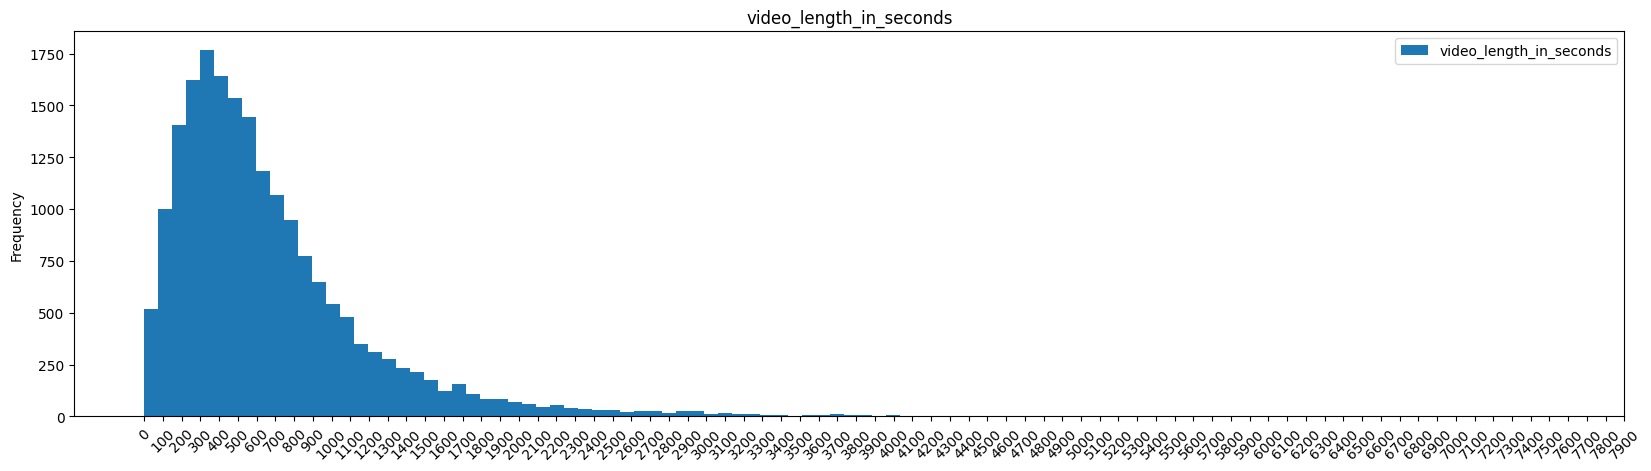

In [11]:
course_chapter_items_df[['video_length_in_seconds']].describe()

ax = course_chapter_items_df.plot.hist(column=['video_length_in_seconds'], bins=100, xticks=range(0,8000,100), figsize=(20,5), title='video_length_in_seconds')
ax.tick_params(axis='x', rotation=45)

In [12]:
users_df.isnull().sum()

user_id                   0
gender                45195
occupation_titles    101510
interests             47810
recreation_names      98631
dtype: int64

(0.0, 3.0, 0.9, 1.2)

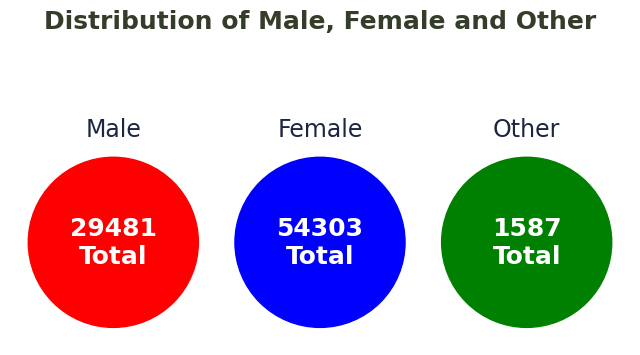

In [13]:
plt.figure(figsize=(8,4))
plt.scatter(x=[0.5, 1.5, 2.5], y=[1,1,1], s=15000, color=['red', 'blue', 'green'])
plt.xlim(0,3)
plt.ylim(0.9,1.2)

plt.title('Distribution of Male, Female and Other', fontsize=18, weight=600, color='#333d29')
plt.text(0.5, 1, '{}\nTotal'.format(str(len(users_df[users_df['gender']=='male']))), va='center', ha='center', fontsize=18, weight=600, color='white')
plt.text(1.5, 1, '{}\nTotal'.format(str(len(users_df[users_df['gender']=='female']))), va='center', ha='center', fontsize=18, weight=600, color='white')
plt.text(2.5, 1, '{}\nTotal'.format(str(len(users_df[users_df['gender']=='other']))), va='center', ha='center', fontsize=18, weight=600, color='white')
plt.text(0.5, 1.11, 'Male', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')
plt.text(1.5, 1.11, 'Female', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')
plt.text(2.5, 1.11, 'Other', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')

plt.axis('off')


In [14]:
subgroups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   subgroup_id    91 non-null     int64 
 1   subgroup_name  91 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [15]:
subgroups2idx = {}
for (id, name) in zip(subgroups_df["subgroup_id"], subgroups_df["subgroup_name"]):
    subgroups2idx.update({name: id})

subgroups2idx

{'更多生活品味': 1,
 '護膚保養與化妝': 2,
 '平面設計': 3,
 '繪畫與插畫': 4,
 '電腦繪圖': 5,
 '應用設計': 6,
 '求職': 7,
 '英文': 8,
 '手作小物': 9,
 'DJ': 10,
 '更多音樂': 11,
 '更多藝術': 12,
 '烹飪料理與甜點': 13,
 '壓力舒緩': 14,
 '運動': 15,
 '親子教育': 16,
 '手工印刷': 17,
 '手工書': 18,
 '動態攝影': 19,
 '素描': 20,
 '樂器': 21,
 '色彩學': 22,
 '字體設計': 23,
 '手寫字': 24,
 '動態設計': 25,
 '音樂理論': 26,
 '刺繡': 27,
 '日文': 28,
 '心靈成長與教育': 29,
 '音樂創作': 30,
 '氣球': 31,
 '程式入門': 32,
 '程式語言': 33,
 '網頁前端': 34,
 '文書處理': 35,
 '角色設計': 36,
 '資料彙整': 37,
 '介面設計': 38,
 '網頁設計': 39,
 '商業攝影': 40,
 '網站架設': 41,
 '更多程式': 42,
 '程式思維': 43,
 '手機程式開發': 44,
 '韓文': 45,
 '更多手作': 46,
 '更多語言': 47,
 '歐洲語言': 48,
 '人聲': 49,
 '個人品牌經營': 50,
 '更多職場技能': 51,
 '網頁後端': 52,
 '後製剪輯': 53,
 '產品設計': 54,
 '靈性發展': 55,
 '影視創作': 56,
 '資料科學': 57,
 '軟體程式開發與維護': 58,
 '職場溝通': 59,
 '表演藝術': 60,
 '創業': 61,
 '文學': 62,
 '區塊鏈': 63,
 '金融商品': 64,
 '文案': 65,
 '數位行銷': 66,
 '設計理論': 67,
 'AI 人工智慧': 68,
 '投資觀念': 69,
 '理財': 70,
 '社會科學': 71,
 '社群行銷': 72,
 '影像創作': 73,
 '遊戲開發': 74,
 '程式理財': 75,
 '量化交易': 76,
 '更多設計': 77,
 '獨立接案': 78,
 '寵

In [16]:
df = users_df.fillna("None")
# interest_df = users_df["interests"].fillna("None")
interest_df = df["interests"]
gender_df = df["gender"]

male_interest_list = []
female_interest_list = []
other_interest_list = []

for gender, interest in zip(gender_df, interest_df):
    if gender == "None":
        continue
    if gender == "male":
        male_interest_list.extend(interest.split(', '))
    elif gender == "female":
        female_interest_list.extend(interest.split(', '))
    elif gender == "other":
        other_interest_list.extend(interest.split(', '))

## add interest to each gender

In [17]:
other_interest_num = []
male_interest_num = []
female_interest_num = []

for interest in other_interest_list:
    for i in interest.split(","):
        if i == "None":
            other_interest_num.append("None")
            continue
        name = i.split("_")[1]
        other_interest_num.append(name)

for interest in male_interest_list:
    for i in interest.split(","):
        if i == "None":
            male_interest_num.append("None")
            continue
        name = i.split("_")[1]
        male_interest_num.append(name)

for interest in female_interest_list:
    for i in interest.split(","):
        if i == "None":
            female_interest_num.append("None")
            continue
        name = i.split("_")[1]
        female_interest_num.append(name)

In [18]:
other_interest_num = []
male_interest_num = []
female_interest_num = []
unseen_interest = []

for interest in other_interest_list:
    for i in interest.split(","):
        if i == "None":
            other_interest_num.append(0)
            continue
        name = i.split("_")[1]
        if name not in subgroups2idx.keys():
            unseen_interest.append(i)
            continue
        other_interest_num.append(subgroups2idx[name])

for interest in male_interest_list:
    for i in interest.split(","):
        if i == "None":
            male_interest_num.append(0)
            continue
        name = i.split("_")[1]
        if name not in subgroups2idx.keys():
            unseen_interest.append(i)
            continue
        male_interest_num.append(subgroups2idx[name])

for interest in female_interest_list:
    for i in interest.split(","):
        if i == "None":
            female_interest_num.append(0)
            continue
        name = i.split("_")[1]
        if name not in subgroups2idx.keys():
            unseen_interest.append(i)
            continue
        female_interest_num.append(subgroups2idx[name])

Counter(unseen_interest)
# 語言_西班牙文 -> 更多語言(47), 歐洲語言(48)
# 手作_篆刻 -> 手作小物(9), 手工印刷(17), 手工書(18), 手寫字(24), 更多手作(46), 字體設計(23)
# 投資理財_更多投資理財 -> 量化交易(76), 程式理財(75), 理財(70), 投資觀念(69), 量化分析(81), 數據分析(87)
# 投資理財_比特幣 -> 區塊鏈(63), 金融商品(64), 數位行銷(66), 投資觀念(69), 理財(70), 程式理財(75), 量化交易(76), 數據分析(87)

Counter({'手作_篆刻': 1913,
         '語言_西班牙文': 4050,
         '投資理財_更多投資理財': 5203,
         '投資理財_比特幣': 2612})

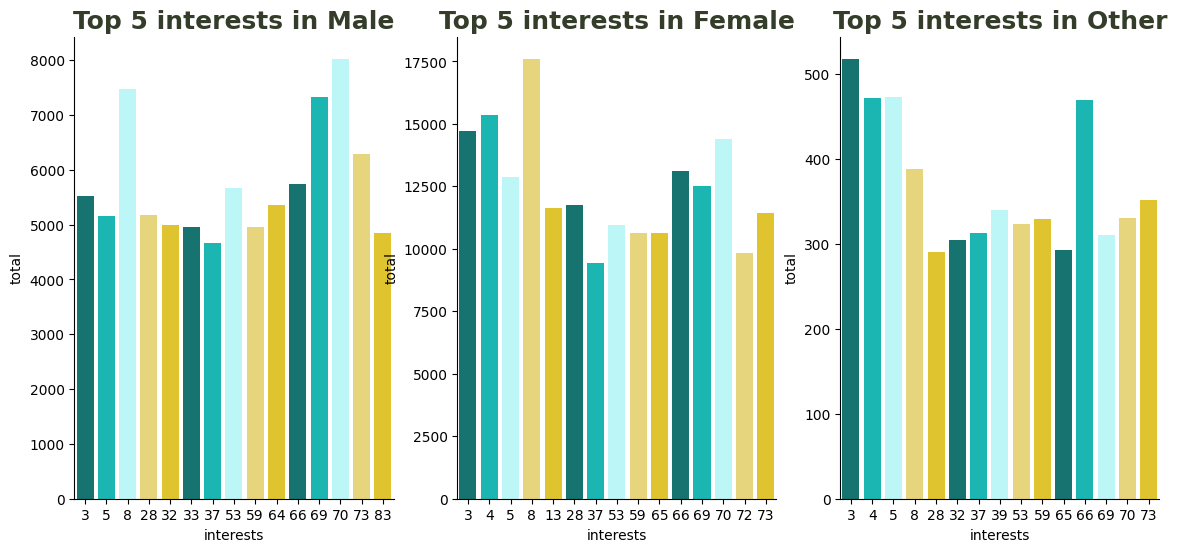

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,6))

male_interest_plot = pd.DataFrame(Counter(male_interest_num).most_common(15), columns=['interests', 'total'])
female_interest_plot = pd.DataFrame(Counter(female_interest_num).most_common(15), columns=['interests', 'total'])
other_interest_plot = pd.DataFrame(Counter(other_interest_num).most_common(15), columns=['interests', 'total'])
ax1 = sns.barplot(data=male_interest_plot, x='interests', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax2 = sns.barplot(data=female_interest_plot, x='interests', y='total', ax=axes[1], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax3 = sns.barplot(data=other_interest_plot, x='interests', y='total', ax=axes[2], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax1.set_title('Top 5 interests in Male', fontsize=18, weight=600, color='#333d29')
ax2.set_title('Top 5 interests in Female', fontsize=18, weight=600, color='#333d29')
ax3.set_title('Top 5 interests in Other', fontsize=18, weight=600, color='#333d29')
sns.despine()


In [20]:
other_interest_num = []
male_interest_num = []
female_interest_num = []
investment = [69, 70, 75, 76, 87]
crypto_coin = [63, 64, 66]
for interest in other_interest_list:
    for i in interest.split(","):
        if i == "None":
            other_interest_num.append(0)
            continue
        name = i.split("_")[1]
        if name == "篆刻":
            continue
        if name == "西班牙文":
            other_interest_num.append(47)
            other_interest_num.append(48)
            continue
        if name == "更多投資理財":
            other_interest_num.append(id for id in investment)
            other_interest_num.append(81)
            continue
        if name == "比特幣":
            other_interest_num.append(id for id in investment)
            other_interest_num.append(id for id in crypto_coin)
            continue
        other_interest_num.append(subgroups2idx[name])

for interest in male_interest_list:
    for i in interest.split(","):
        if i == "None":
            male_interest_num.append(0)
            continue
        name = i.split("_")[1]
        if name == "篆刻":
            continue
        if name == "西班牙文":
            male_interest_num.append(47)
            male_interest_num.append(48)
            continue
        if name == "更多投資理財":
            male_interest_num.append(id for id in investment)
            male_interest_num.append(81)
            continue
        if name == "比特幣":
            male_interest_num.append(id for id in investment)
            male_interest_num.append(id for id in crypto_coin)
            continue
        male_interest_num.append(subgroups2idx[name])

for interest in female_interest_list:
    for i in interest.split(","):
        if i == "None":
            female_interest_num.append(0)
            continue
        name = i.split("_")[1]
        if name == "篆刻":
            continue
        if name == "西班牙文":
            female_interest_num.append(47)
            female_interest_num.append(48)
            continue
        if name == "更多投資理財":
            female_interest_num.append(id for id in investment)
            female_interest_num.append(81)
            continue
        if name == "比特幣":
            female_interest_num.append(id for id in investment)
            female_interest_num.append(id for id in crypto_coin)
            continue
        female_interest_num.append(subgroups2idx[name])

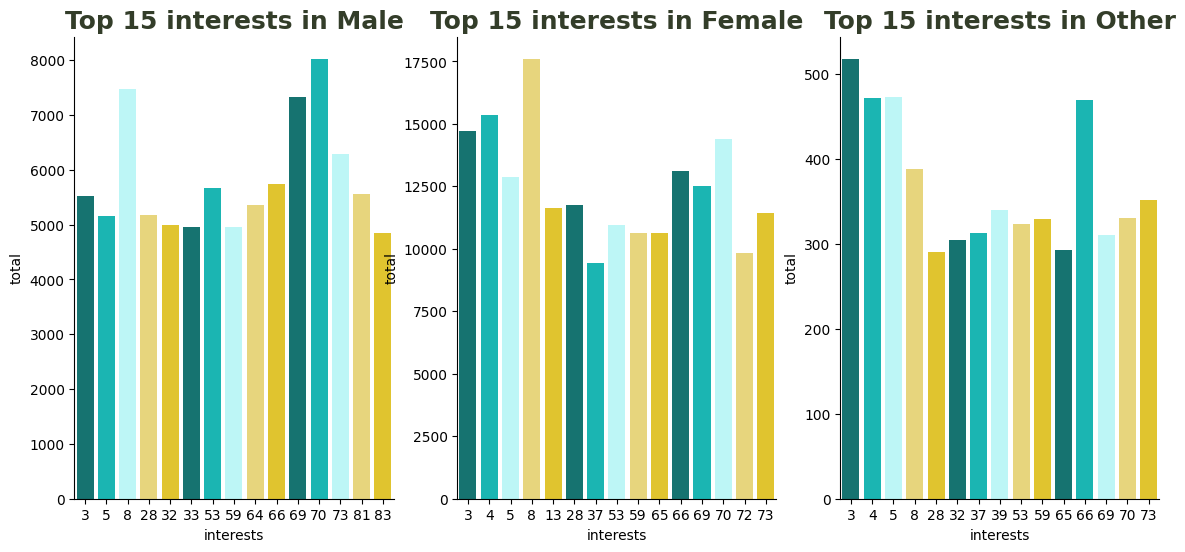

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,6))

male_interest_plot = pd.DataFrame(Counter(male_interest_num).most_common(15), columns=['interests', 'total'])
female_interest_plot = pd.DataFrame(Counter(female_interest_num).most_common(15), columns=['interests', 'total'])
other_interest_plot = pd.DataFrame(Counter(other_interest_num).most_common(15), columns=['interests', 'total'])
ax1 = sns.barplot(data=male_interest_plot, x='interests', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax2 = sns.barplot(data=female_interest_plot, x='interests', y='total', ax=axes[1], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax3 = sns.barplot(data=other_interest_plot, x='interests', y='total', ax=axes[2], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax1.set_title('Top 15 interests in Male', fontsize=18, weight=600, color='#333d29')
ax2.set_title('Top 15 interests in Female', fontsize=18, weight=600, color='#333d29')
ax3.set_title('Top 15 interests in Other', fontsize=18, weight=600, color='#333d29')
sns.despine()


In [ ]:

train_group_df